In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras

import matplotlib.pyplot as plt

2023-06-26 23:00:13.892732: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-26 23:00:14.418288: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-26 23:00:14.419679: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-26 23:00:16.573903: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
(train_images, train_labels),(test_images, test_labels) = datasets.cifar10.load_data()

In [4]:
train_images.shape

(50000, 32, 32, 3)

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'car', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
train_images.max()

255

In [7]:
train_images.min()

0

In [8]:
train_images,test_images = train_images/255.0,test_images/255.0

In [9]:
train_images.max()

1.0

In [10]:
train_images.min()

0.0

In [11]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [14]:
epochs = 10
batch_size = 64
num_classes = 10

train_label_cat = tf.keras.utils.to_categorical(train_labels, num_classes)
test_label_cat = tf.keras.utils.to_categorical(test_labels, num_classes)

model.compile(optimizer = 'adam', loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])

history = model.fit(train_images, train_label_cat, epochs = epochs, batch_size = batch_size, validation_data = (test_images, test_label_cat))

2023-06-26 23:00:33.644806: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
782/782 [==============================] - ETA: 0s - loss: 1.5454 - accuracy: 0.4370

2023-06-26 23:01:16.948338: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


782/782 [==============================] - 40s 47ms/step - loss: 1.5454 - accuracy: 0.4370 - val_loss: 1.2935 - val_accuracy: 0.5429
Epoch 2/10
782/782 [==============================] - 31s 40ms/step - loss: 1.1847 - accuracy: 0.5801 - val_loss: 1.1072 - val_accuracy: 0.6070
Epoch 3/10
782/782 [==============================] - 31s 40ms/step - loss: 1.0339 - accuracy: 0.6353 - val_loss: 0.9831 - val_accuracy: 0.6635
Epoch 4/10
782/782 [==============================] - 31s 40ms/step - loss: 0.9337 - accuracy: 0.6742 - val_loss: 0.9757 - val_accuracy: 0.6599
Epoch 5/10
782/782 [==============================] - 31s 40ms/step - loss: 0.8642 - accuracy: 0.6966 - val_loss: 0.9363 - val_accuracy: 0.6774
Epoch 6/10
782/782 [==============================] - 31s 40ms/step - loss: 0.8022 - accuracy: 0.7202 - val_loss: 0.8758 - val_accuracy: 0.7039
Epoch 7/10
782/782 [==============================] - 32s 41ms/step - loss: 0.7464 - accuracy: 0.7398 - val_loss: 0.9277 - val_accuracy: 0.6862
Epo

Text(0, 0.5, 'Accuracy')

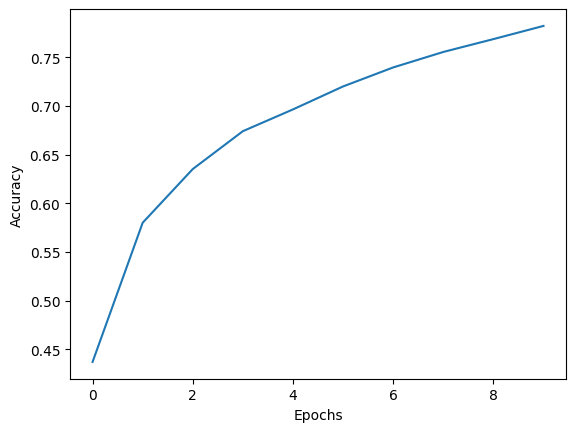

In [15]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_label_cat)
test_loss, test_acc

2023-06-26 23:06:10.952500: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 6ms/step - loss: 0.8398 - accuracy: 0.7204


(0.8397504091262817, 0.7203999757766724)

In [17]:
plt.plot(model.epoch())

AttributeError: 'Sequential' object has no attribute 'epoch'

In [18]:
plt.plot(model.epoch)

AttributeError: 'Sequential' object has no attribute 'epoch'

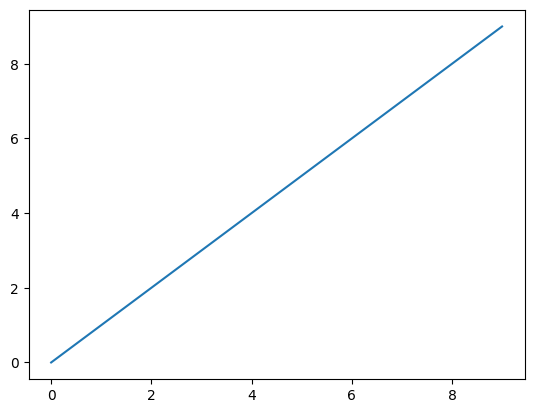

In [19]:
plt.plot(history.epoch)